**VADER**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction import text
import string


In [3]:
!pip install vaderSentiment
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [32]:
#  defining the functions to calculate the polarity of tweets
analyser = SentimentIntensityAnalyzer()

def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

Loading datasets :

In [35]:
modi_df = pd.read_csv("/content/drive/MyDrive/Election Prediction/dataset/modi_reviews.csv")
modi_df.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...


In [36]:
modi_df.shape

(25688, 3)

In [55]:
rahul_df = pd.read_csv("/content/drive/MyDrive/Election Prediction/dataset/rahul_reviews.csv")
rahul_df.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


In [56]:
# Remove stopwords
stop = text.ENGLISH_STOP_WORDS
modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop]))
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop]))

# Remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

modi_df['Tweet'] = modi_df['Tweet'].apply(remove_punctuations)
rahul_df['Tweet'] = rahul_df['Tweet'].apply(remove_punctuations)


## Modi Dataset

In [46]:
# np.random.seed(10)
# remove_n = 16688
# drop_indices = np.random.choice(modi_df.index, remove_n, replace=False)
# df_modi = modi_df.drop(drop_indices)
# df_modi.shape

(9000, 7)

In [57]:
modi_df['pos'] = modi_df['Tweet'].apply(lambda x :pos(x))
modi_df['neg'] = modi_df['Tweet'].apply(lambda x :neg(x))
modi_df['neu'] = modi_df['Tweet'].apply(lambda x :neu(x))

In [58]:
emotion=[]
for i in range(0,25688):
    emotion.append(max(modi_df['pos'][i],modi_df['neu'][i],modi_df['neg'][i]))

modi_df['FinalEmotion']=emotion

for i in range(0,25688):
    if modi_df['FinalEmotion'][i]==modi_df['pos'][i]:
        modi_df['FinalEmotion'][i]='positive'
    elif modi_df['FinalEmotion'][i]==modi_df['neg'][i]:
        modi_df['FinalEmotion'][i]='negative'
    elif modi_df['FinalEmotion'][i]==modi_df['neu'][i]:
        modi_df['FinalEmotion'][i]='neutral'
modi_df

<ipython-input-58-624a5e14c737>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['FinalEmotion'][i]='neutral'


,Unnamed: 0,User,Tweet,pos,neg,neu,FinalEmotion
0,0,advosushildixit,anjanaomkashyap I seeing future bjp spokespers...,0.307,0.000,0.693,neutral
1,1,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Eve...,0.228,0.000,0.772,neutral
2,2,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Eve...,0.228,0.000,0.772,neutral
3,3,TheNirbhay1,PM Modi creates new record PM democratic count...,0.313,0.000,0.687,neutral
4,4,ShakeChilli,abhijitmajumder Appointment Successor God forb...,0.221,0.113,0.667,neutral
...,...,...,...,...,...,...,...
25683,25683,shv_indian,1DDrive ModiSpeaksToNews18 LokSabhaElections20...,0.000,0.136,0.864,neutral
25684,25684,SONUPINKOO,I seriously worried future Indian democracy na...,0.284,0.112,0.604,neutral
25685,25685,SONUPINKOO,If narendramodi Bad Why does INCIndia needs Ma...,0.000,0.156,0.844,neutral
25686,25686,SONUPINKOO,On 23rd March Pakistan Day I Urge Indians Dere...,0.000,0.000,1.000,neutral


In [59]:
modi_df['FinalEmotion'].value_counts()

FinalEmotion
neutral     24970
positive      555
negative      163
Name: count, dtype: int64

<ipython-input-60-581037962928>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
<ipython-input-60-581037962928>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])


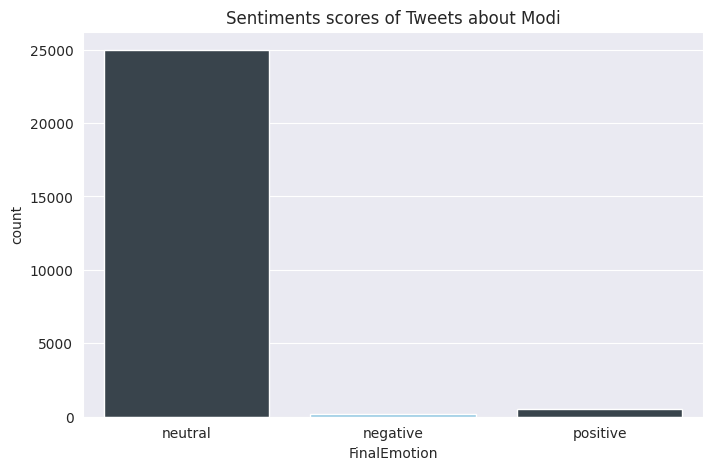

In [60]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')
plt.show()

## Rahul dataset

In [ ]:
# np.random.seed(10)
# remove_n = 367
# drop_indices = np.random.choice(rahul_df.index, remove_n, replace=False)
# df_rahul = rahul_df.drop(drop_indices)
# df_rahul.shape

In [61]:
rahul_df['pos'] = rahul_df['Tweet'].apply(lambda x :pos(x))
rahul_df['neg'] = rahul_df['Tweet'].apply(lambda x :neg(x))
rahul_df['neu'] = rahul_df['Tweet'].apply(lambda x :neu(x))

In [62]:
emotion=[]
for i in range(0,14261):
    emotion.append(max(rahul_df['pos'][i],rahul_df['neu'][i],rahul_df['neg'][i]))

rahul_df['FinalEmotion']=emotion

for i in range(0,14261):
    if rahul_df['FinalEmotion'][i]==rahul_df['pos'][i]:
        rahul_df['FinalEmotion'][i]='positive'
    elif rahul_df['FinalEmotion'][i]==rahul_df['neg'][i]:
        rahul_df['FinalEmotion'][i]='negative'
    elif rahul_df['FinalEmotion'][i]==rahul_df['neu'][i]:
        rahul_df['FinalEmotion'][i]='neutral'
rahul_df

<ipython-input-62-5395e2e821be>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df['FinalEmotion'][i]='neutral'


,Unnamed: 0,User,Tweet,pos,neg,neu,FinalEmotion
0,0,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769,neutral
1,1,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848,neutral
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000,neutral
3,3,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682,neutral
4,4,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828,neutral
...,...,...,...,...,...,...,...
14256,14256,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806,neutral
14257,14257,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737,neutral
14258,14258,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903,neutral
14259,14259,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906,neutral


In [63]:
rahul_df['FinalEmotion'].value_counts()

FinalEmotion
neutral     13930
positive      225
negative      106
Name: count, dtype: int64

<ipython-input-66-0c737734e565>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
<ipython-input-66-0c737734e565>:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])


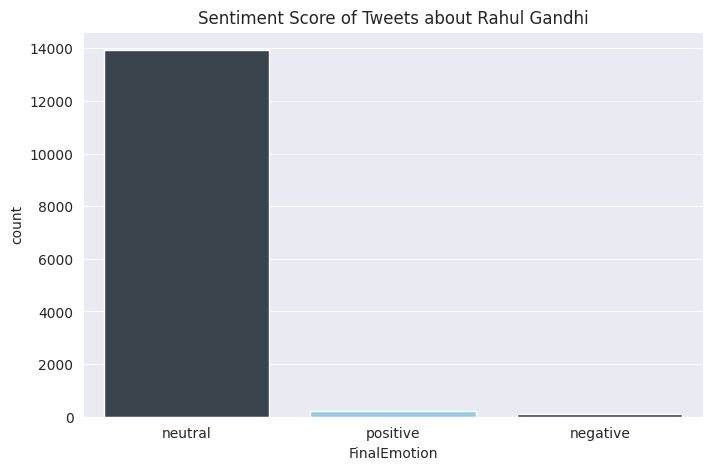

In [66]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiment Score of Tweets about Rahul Gandhi')
plt.show()